In [ ]:
## Import Modules

In [7]:
import os



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [8]:
TRAIN_DIR = '../input/facial-emotion-recognition-dataset/train/train/'
TEST_DIR = '../input/facial-emotion-recognition-dataset/test/test/'

In [9]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
    
    return image_paths, labels

In [10]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,../input/facial-emotion-recognition-dataset/tr...,sad
1,../input/facial-emotion-recognition-dataset/tr...,neutral
2,../input/facial-emotion-recognition-dataset/tr...,disgust
3,../input/facial-emotion-recognition-dataset/tr...,sad
4,../input/facial-emotion-recognition-dataset/tr...,happy


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,../input/facial-emotion-recognition-dataset/te...,surprise
1,../input/facial-emotion-recognition-dataset/te...,surprise
2,../input/facial-emotion-recognition-dataset/te...,surprise
3,../input/facial-emotion-recognition-dataset/te...,surprise
4,../input/facial-emotion-recognition-dataset/te...,surprise


In [8]:
## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

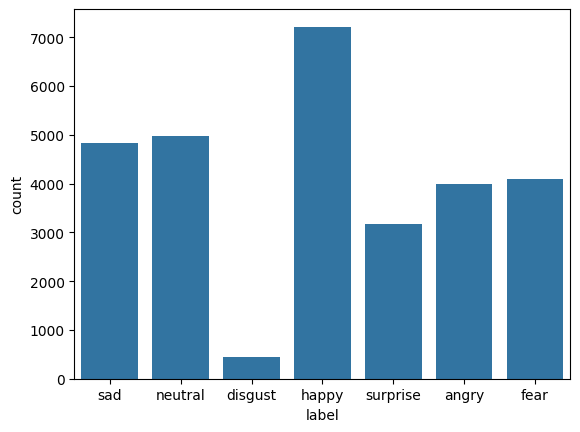

In [12]:
sns.countplot(x='label', data=train)

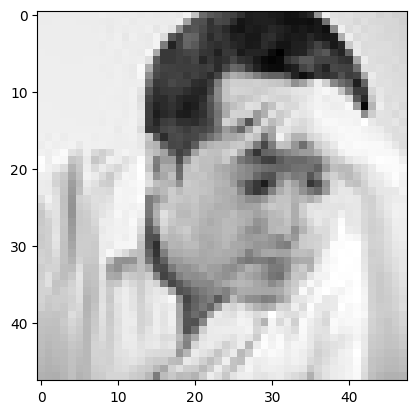

In [13]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

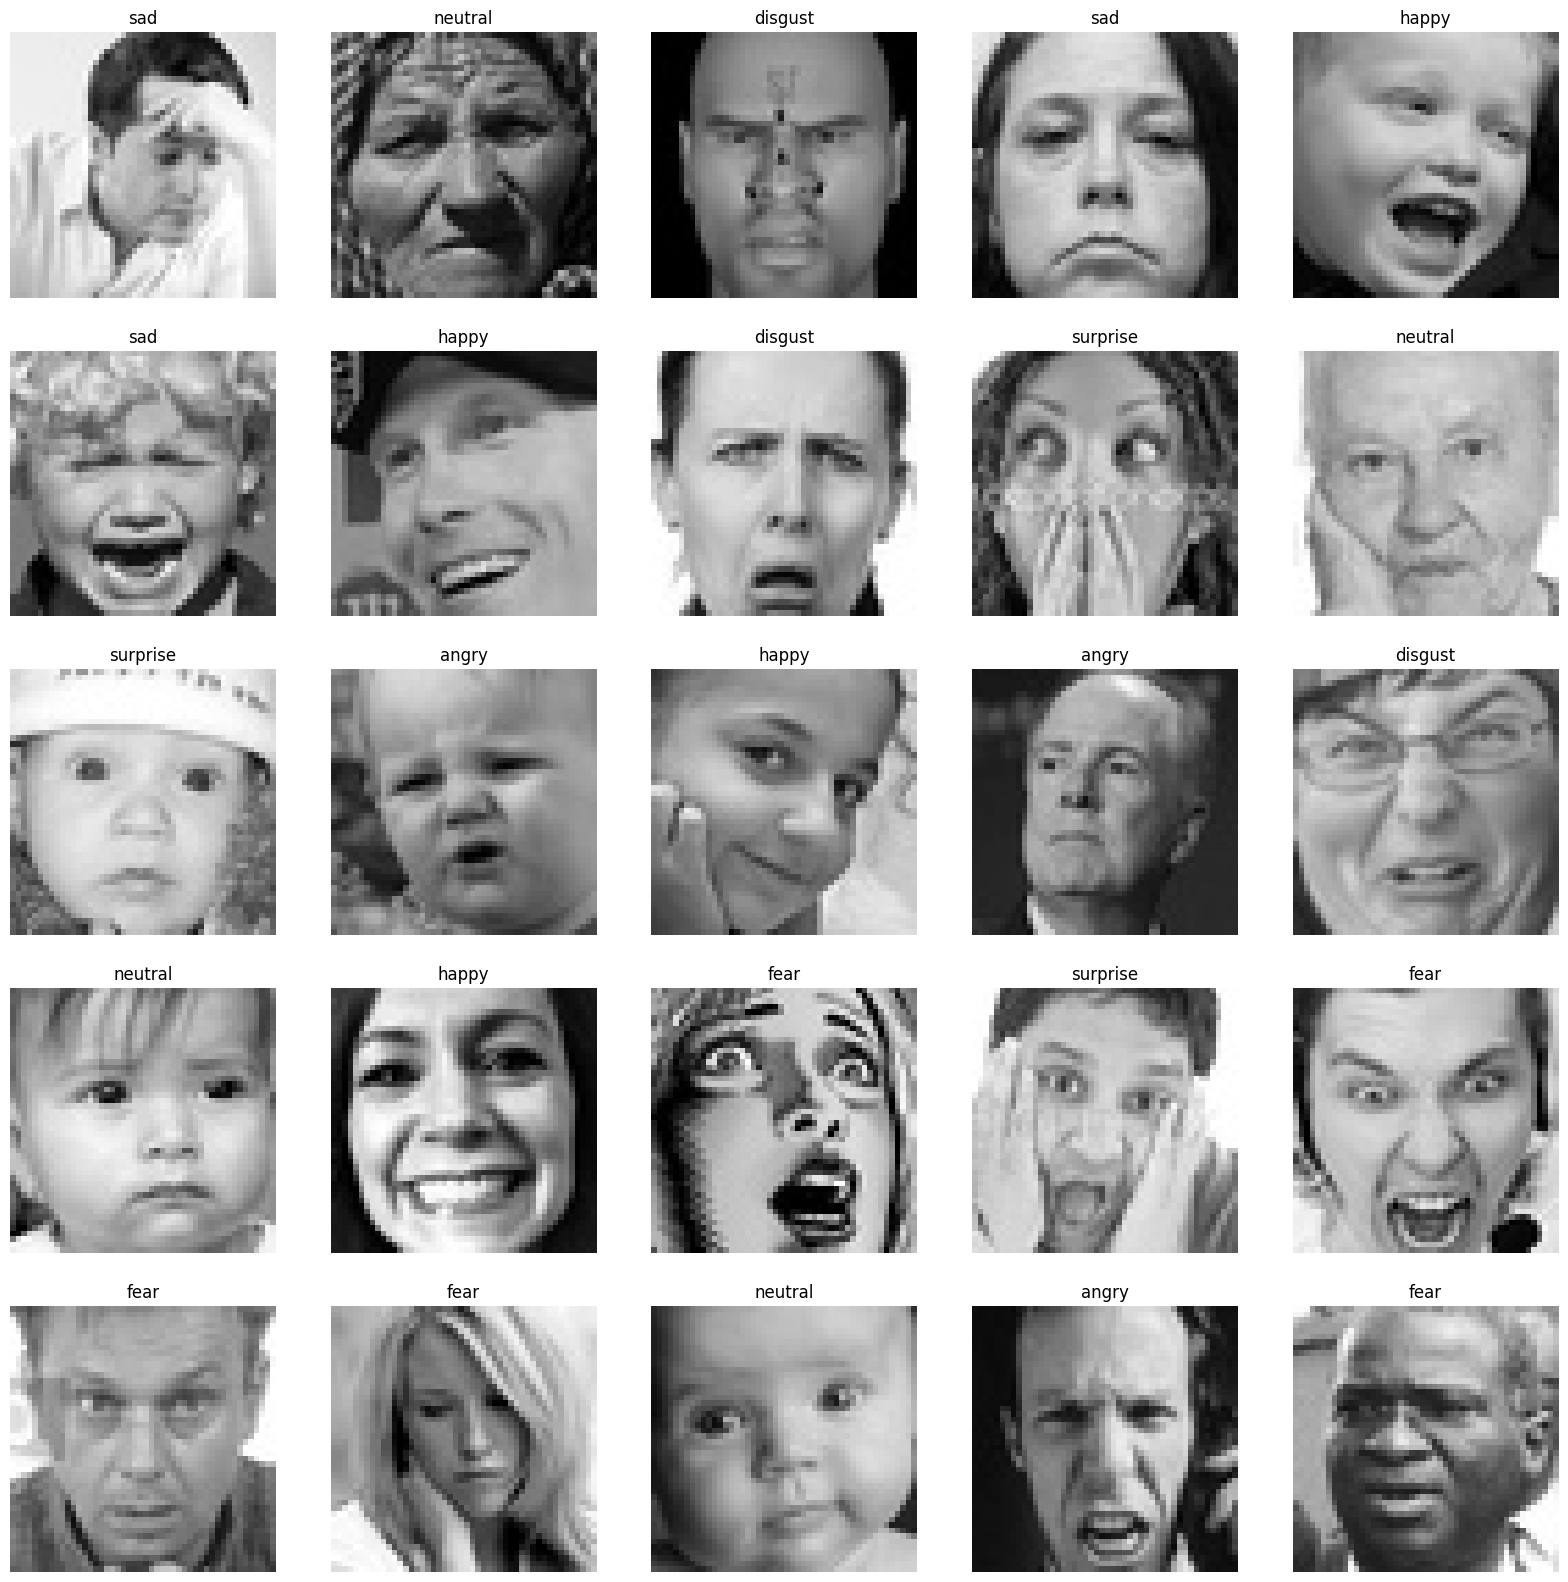

In [14]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [12]:
## Feature Extraction

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [16]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [17]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [18]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [19]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [20]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [22]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [23]:
## Model Creation

In [37]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']           
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
print("Current y_train shape:", y_train.shape)
print("Current y_test shape: ", y_test.shape)
print("\nSample of corrupted labels (first 2 rows):")
print(y_train[:2])

Current y_train shape: (28709,)
Current y_test shape:  (7178,)

Sample of corrupted labels (first 2 rows):
[4 6]


In [39]:
# Mapping must match your dataset exactly
emotion_map = {
    'angry':    0,
    'disgust':  1,
    'fear':     2,
    'happy':    3,
    'sad':      4,
    'surprise': 5,
    'neutral':  6
}

# Recreate integer labels
y_train = train['label'].map(emotion_map).values.astype('int32')
y_test  = test['label'].map(emotion_map).values.astype('int32')

# Very important checks!
print("New y_train shape:", y_train.shape)         # should be (28709,)
print("New y_test shape: ", y_test.shape)          # should be (7178,)
print("Sample values:", y_train[:10])
print("Unique values:", np.unique(y_train))        # should show [0 1 2 3 4 5 6]

New y_train shape: (28709,)
New y_test shape:  (7178,)
Sample values: [4 6 1 4 3 4 3 1 5 6]
Unique values: [0 1 2 3 4 5 6]


In [30]:
## Plot the Results

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 690s 3s/step - accuracy: 0.2523 - loss: 1.7962 - val_accuracy: 0.2949 - val_loss: 1.7170
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.3026 - loss: 1.7153 - val_accuracy: 0.3922 - val_loss: 1.5658
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.3723 - loss: 1.5910 - val_accuracy: 0.4308 - val_loss: 1.4600
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - accuracy: 0.4279 - loss: 1.4809 - val_accuracy: 0.4792 - val_loss: 1.3515
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 703s 3s/step - accuracy: 0.4550 - loss: 1.4235 - val_accuracy: 0.4961 - val_loss: 1.3048
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 683s 3s/step - accuracy: 0.4670 - loss: 1.3819 - val_accuracy: 0.5138 - val_loss: 1.2667
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.4840 - loss: 1.3433 - val_accuracy: 0.5320 - val_loss: 1.2320
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 683s 3s/step - accuracy: 0.4941 - loss: 1.3266 - val_accu

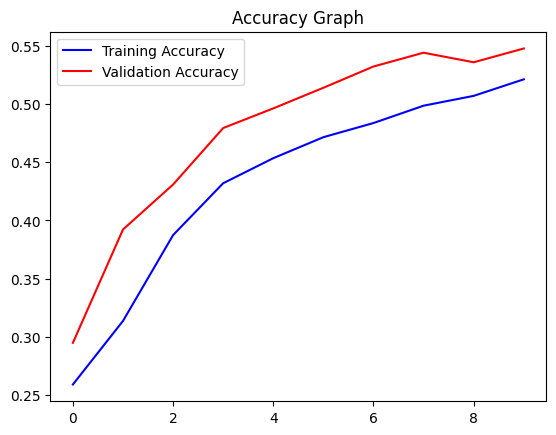

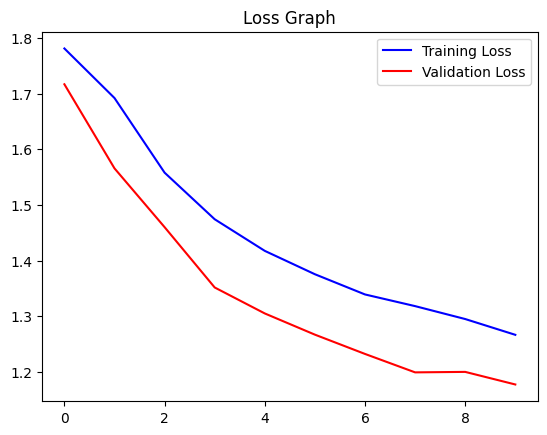

In [46]:
import matplotlib.pyplot as plt   

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=10,                  
    validation_data=(x_test, y_test),
    verbose=1
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

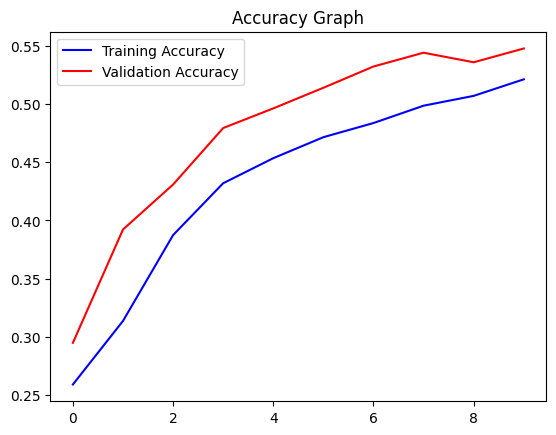

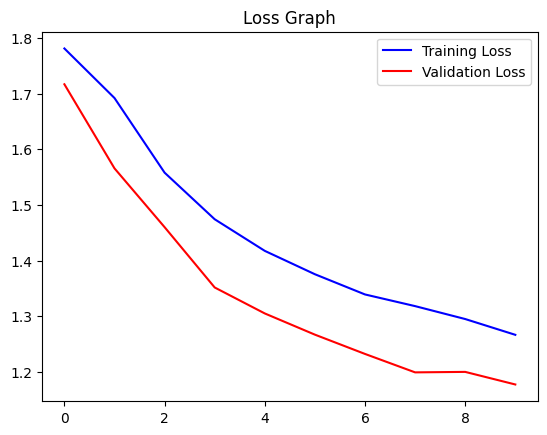

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

In [48]:
import random
import numpy as np          # if you're already using numpy, you can also do this alternative below

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Output: happy


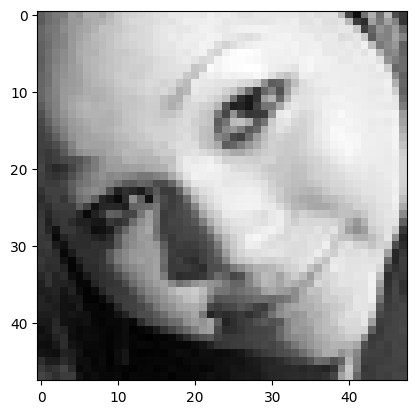

In [51]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');


Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Output: happy


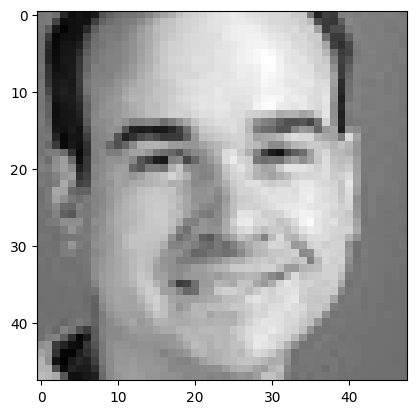

In [54]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Output: happy


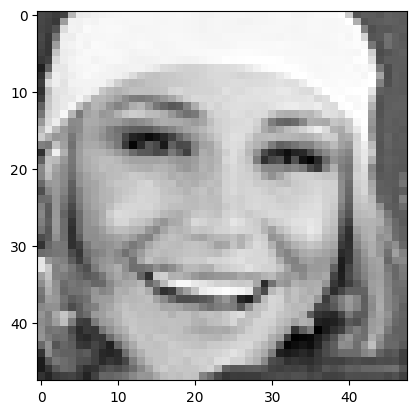

In [59]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');